# Lection 6

## Transfer Learning



<img src="../img/tl1.png" width=500px>

[Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf)

[TensorFlow Hub](https://www.tensorflow.org/hub)

[Daniel Bourke github repo](https://github.com/mrdbourke/tensorflow-deep-learning/)



# Plan

1. Import TensorFlow
2. Data preparation
3. Modeling
4. Evaluation & Improving
5. Model save & load

In [1]:
import os

In [2]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 1 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [3]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


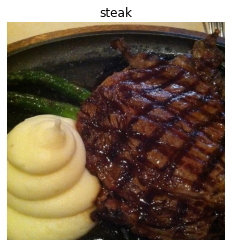

In [5]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [6]:
img.shape

(512, 512, 3)

In [7]:
img/255

array([[[0.83529412, 0.74901961, 0.41176471],
        [0.82745098, 0.74117647, 0.40392157],
        [0.81960784, 0.73333333, 0.39607843],
        ...,
        [0.65490196, 0.61568627, 0.4745098 ],
        [0.64705882, 0.59215686, 0.43921569],
        [0.64705882, 0.59607843, 0.42352941]],

       [[0.82745098, 0.74117647, 0.40392157],
        [0.81568627, 0.72941176, 0.39215686],
        [0.82352941, 0.7372549 , 0.4       ],
        ...,
        [0.6745098 , 0.63529412, 0.49411765],
        [0.65882353, 0.60392157, 0.45098039],
        [0.64705882, 0.59607843, 0.42352941]],

       [[0.83529412, 0.75294118, 0.40392157],
        [0.81960784, 0.7372549 , 0.38823529],
        [0.85098039, 0.75686275, 0.41960784],
        ...,
        [0.66666667, 0.62745098, 0.48627451],
        [0.65098039, 0.59607843, 0.44313725],
        [0.62745098, 0.57647059, 0.40392157]],

       ...,

       [[0.57647059, 0.54509804, 0.22745098],
        [0.59215686, 0.56078431, 0.24313725],
        [0.60392157, 0

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense

model_1 = tf.keras.models.Sequential([
  Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation="sigmoid") # binary activation output
])

In [10]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [11]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=2,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/2
47/47 [==============================] - 66s 1s/step - loss: 0.5733 - accuracy: 0.6927 - val_loss: 0.3959 - val_accuracy: 0.8260
Epoch 2/2
47/47 [==============================] - 58s 1s/step - loss: 0.4181 - accuracy: 0.8207 - val_loss: 0.3370 - val_accuracy: 0.8580


In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0